In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
Xtrain.shape

(614, 8)

In [ ]:
Xtest.shape

(154, 8)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Dense, Dropout

In [ ]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(Xtrain,ytrain,epochs=100,batch_size=32,validation_data=(Xtest,ytest))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7437 - loss: 0.5321 - val_accuracy: 0.6883 - val_loss: 0.5924
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7622 - loss: 0.5088 - val_accuracy: 0.7338 - val_loss: 0.6066
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7485 - loss: 0.5426 - val_accuracy: 0.7208 - val_loss: 0.5915
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7396 - loss: 0.5162 - val_accuracy: 0.6558 - val_loss: 0.6210
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7436 - loss: 0.5727 - val_accuracy: 0.6623 - val_loss: 0.7318
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6925 - loss: 0.6357 - val_accuracy: 0.7013 - val_loss: 0.6117
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7345 - loss: 0.5488 - val_accuracy: 0.7597 - val_loss: 0.6075
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6816 - loss: 0.6402 - val_accuracy: 0.6883 - 

In [ ]:
ypred=model.predict(Xtest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


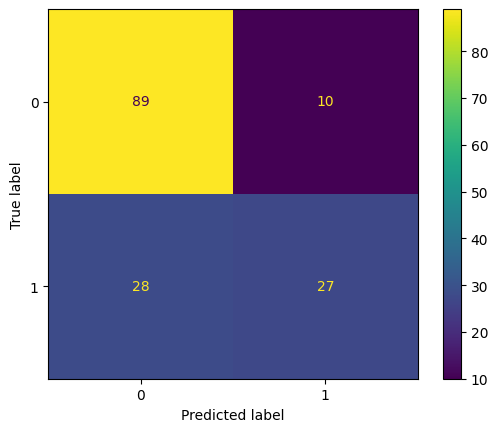

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred.round())
plt.show()

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(32,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice('optimizer',values=['adam','rmsprop','adadelta','nadam'])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(Xtrain,ytrain,epochs=5,validation_data=(Xtest,ytest))

In [ ]:
bestoptimizer=tuner.get_best_hyperparameters(num_trials=1)[0]
bestoptimizer.get('optimizer')

'adadelta'

In [ ]:
def build_model(hp):
  model=Sequential()
  model.add(layers.Input(shape=(8,)))
  numhiddenlayers=hp.Int('numhiddenlayers',1,3)
  for i in range(numhiddenlayers):
    model.add(Dense(units=hp.Int(f"units_{i}",min_value=32,max_value=128,step=32),activation='relu'))
    model.add(Dropout(hp.Choice('Dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
  model.add(Dense(1,activation='sigmoid'))
  optimizerchoice=hp.Choice('optimizer',values=['adam','rmsprop','adadelta','sgd'])
  model.compile(optimizer=optimizerchoice,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='abc20')

Reloading Tuner from mydir/abc20/tuner0.json


In [ ]:
tuner.search(Xtrain,ytrain,epochs=10,validation_data=(Xtest,ytest))

In [ ]:
besthp=tuner.get_best_hyperparameters(1)

In [ ]:
tuner.search(Xtrain,ytrain,epochs=5,validation_data=(Xtest,ytest))